In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = ['vtec', 'vtec_dt_lag_3', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
tempo  = ['state_day', 'state_night', 'state_dawn']
mdv1 = ['vm1', 'vd1']
mdv2 = ['vm2', 'vd2']
lag = ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20']

original = MySet('original', ['vtec', 'vtec_dt_lag_3', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt_lag_3 = MySet('vtec_dt_lag_3', ['vtec_dt_lag_3'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt_lag_3,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt_lag_3+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

In [6]:
param_grid = True

0  ->  original
Error for the time series sample:
acc             0.852398
f1              0.506405
far             0.461264
fn             46.300000
fp             36.800000
kappa           0.068798
me              0.352143
mse             0.004425
pod             0.479775
precission      0.538736
re             24.575531
recall          0.479775
tn            437.200000
tp             42.700000
tse             1.577198
dtype: float64


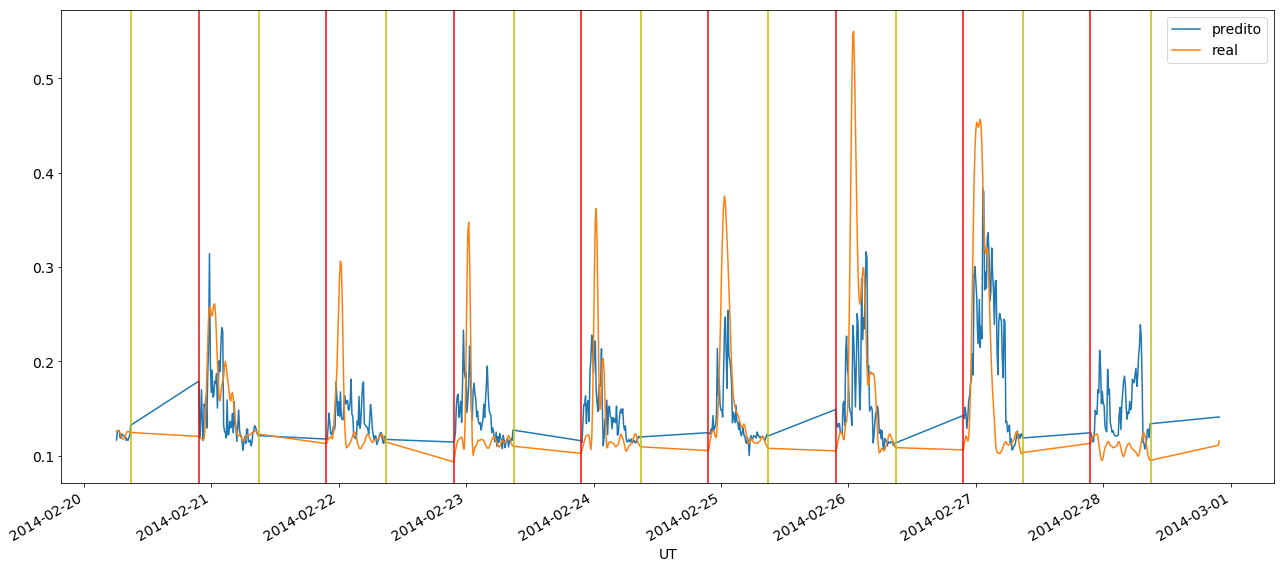


1  ->  original - vtec
Error for the time series sample:
acc             0.848135
f1              0.576645
far             0.483584
fn             30.800000
fp             54.700000
kappa           0.050804
me              0.332381
mse             0.004682
pod             0.653933
precission      0.516416
re             30.075992
recall          0.653933
tn            419.300000
tp             58.200000
tse             1.622917
dtype: float64


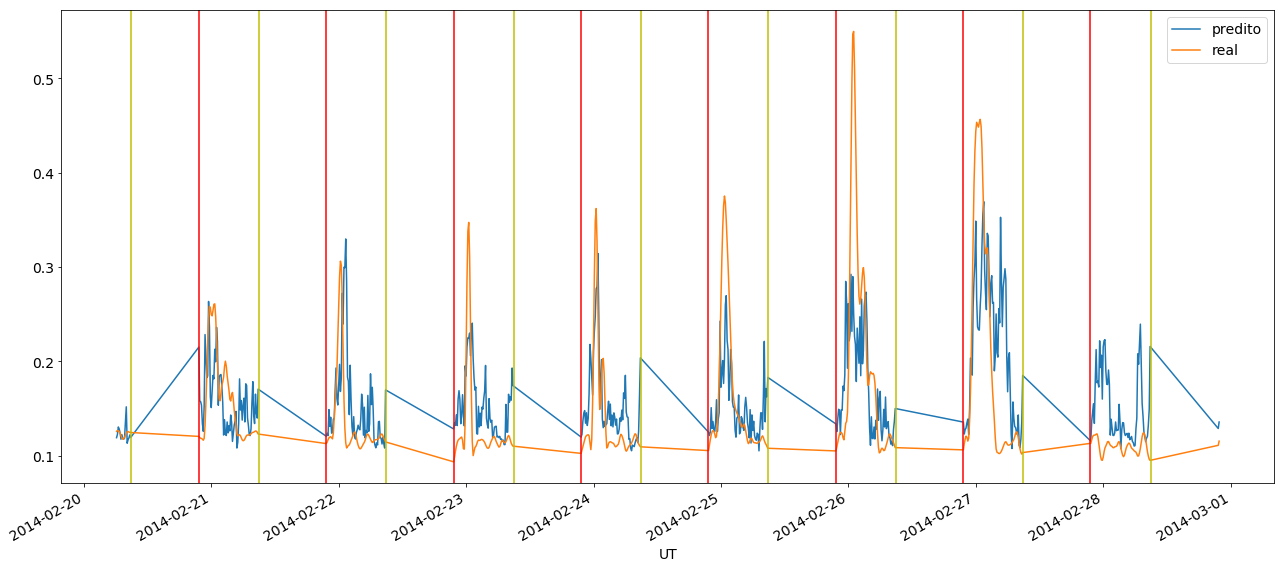


2  ->  original - vtec_dt_lag_3
Error for the time series sample:
acc             0.858437
f1              0.505696
far             0.434043
fn             48.100000
fp             31.600000
kappa           0.071233
me              0.346567
mse             0.004458
pod             0.459551
precission      0.565957
re             23.981097
recall          0.459551
tn            442.400000
tp             40.900000
tse             1.583586
dtype: float64


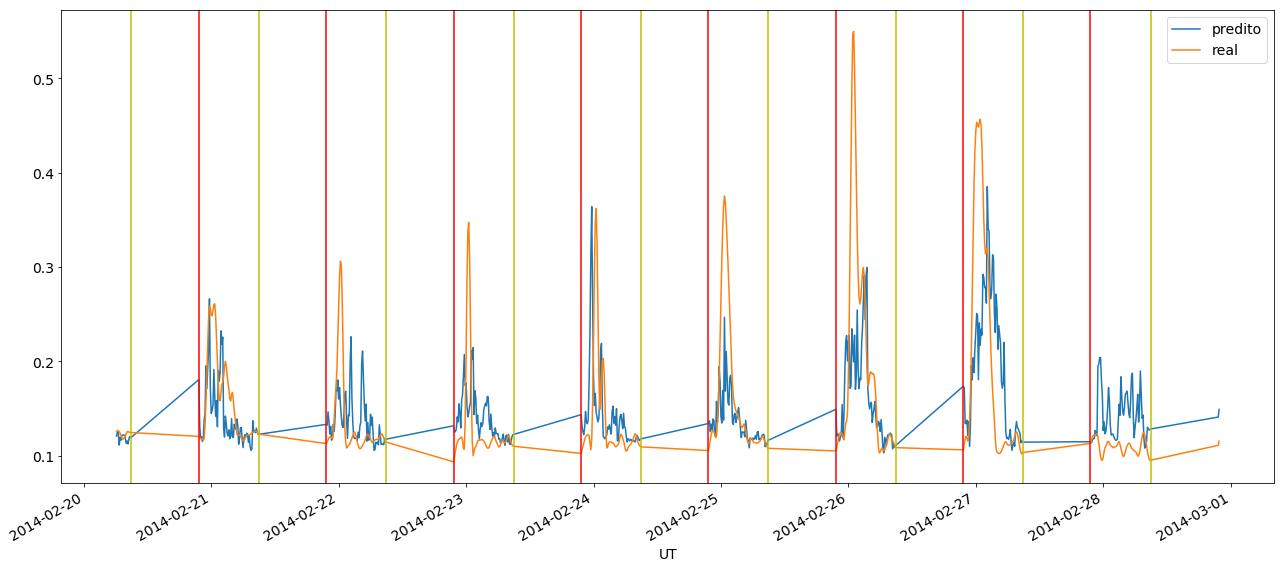


3  ->  original - gvtec1
Error for the time series sample:
acc             0.868384
f1              0.533553
far             0.391136
fn             46.600000
fp             27.500000
kappa           0.069339
me              0.364352
mse             0.004387
pod             0.476404
precission      0.608864
re             24.574658
recall          0.476404
tn            446.500000
tp             42.400000
tse             1.571326
dtype: float64


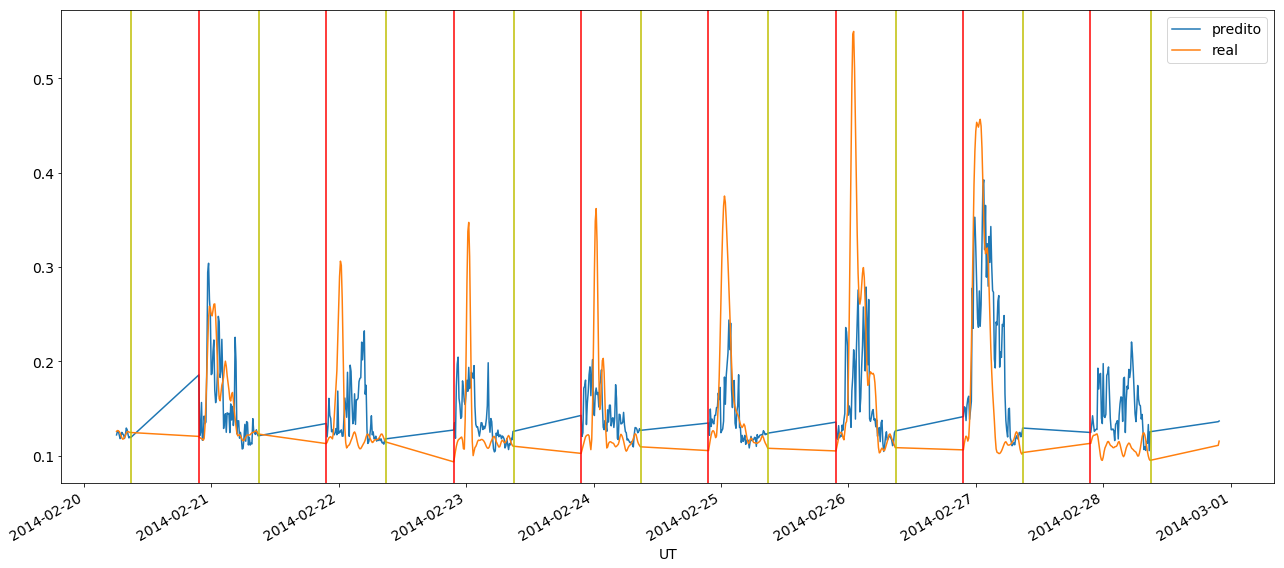


4  ->  original - gvtec1_dt
Error for the time series sample:
acc             0.860746
f1              0.519621
far             0.426739
fn             46.600000
fp             31.800000
kappa           0.069231
me              0.361585
mse             0.004274
pod             0.476404
precission      0.573261
re             23.011382
recall          0.476404
tn            442.200000
tp             42.400000
tse             1.550598
dtype: float64


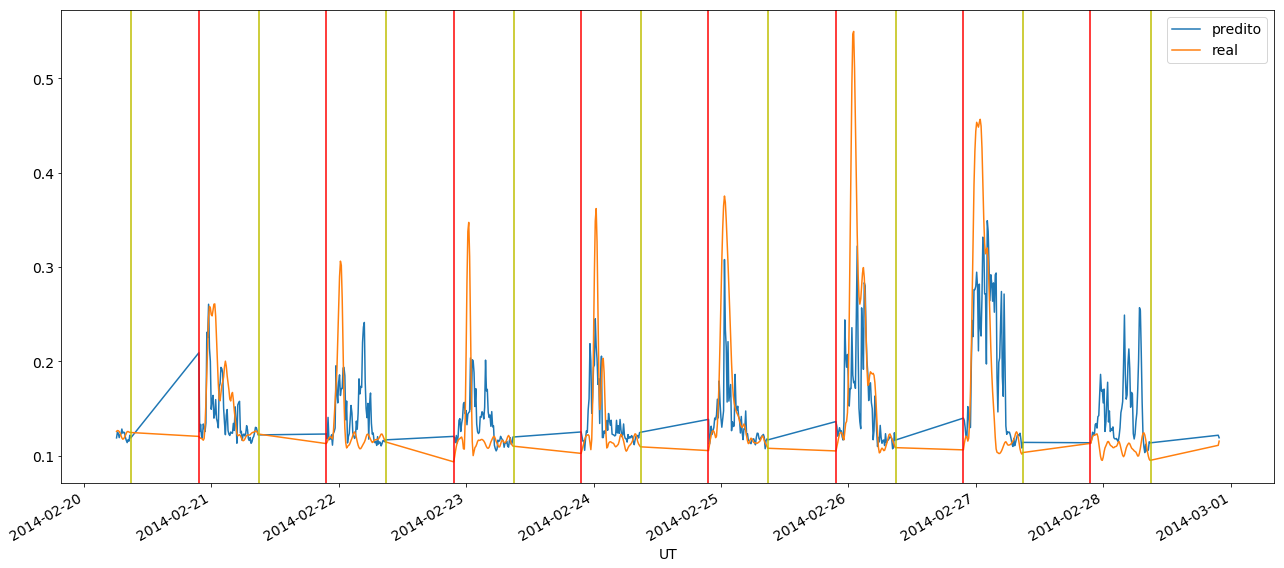


5  ->  original - gvtec2
Error for the time series sample:
acc             0.807638
f1              0.496352
far             0.575547
fn             35.600000
fp             72.700000
kappa           0.057416
me              0.350518
mse             0.005397
pod             0.600000
precission      0.424453
re             31.681182
recall          0.600000
tn            401.300000
tp             53.400000
tse             1.742817
dtype: float64


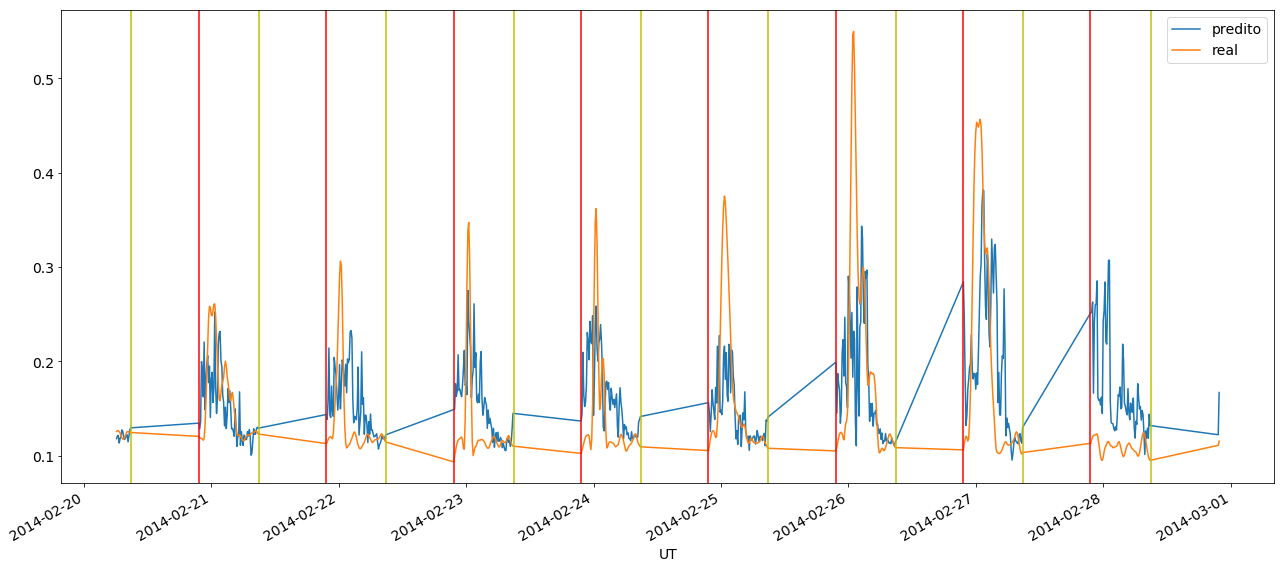


6  ->  original - gvtec2_dt
Error for the time series sample:
acc             0.871048
f1              0.564280
far             0.390325
fn             42.100000
fp             30.500000
kappa           0.063327
me              0.357918
mse             0.004369
pod             0.526966
precission      0.609675
re             24.084209
recall          0.526966
tn            443.500000
tp             46.900000
tse             1.567408
dtype: float64


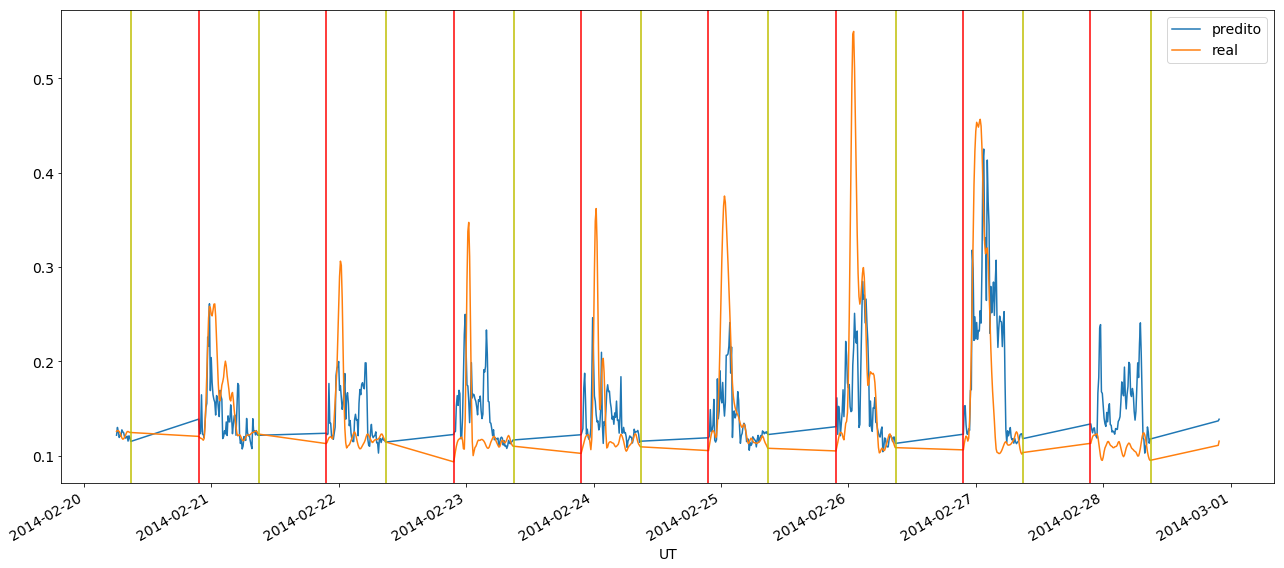


7  ->  original + tempo
Error for the time series sample:
acc             0.869982
f1              0.578919
far             0.404208
fn             38.500000
fp             34.700000
kappa           0.059007
me              0.353210
mse             0.004131
pod             0.567416
precission      0.595792
re             24.121536
recall          0.567416
tn            439.300000
tp             50.500000
tse             1.524489
dtype: float64


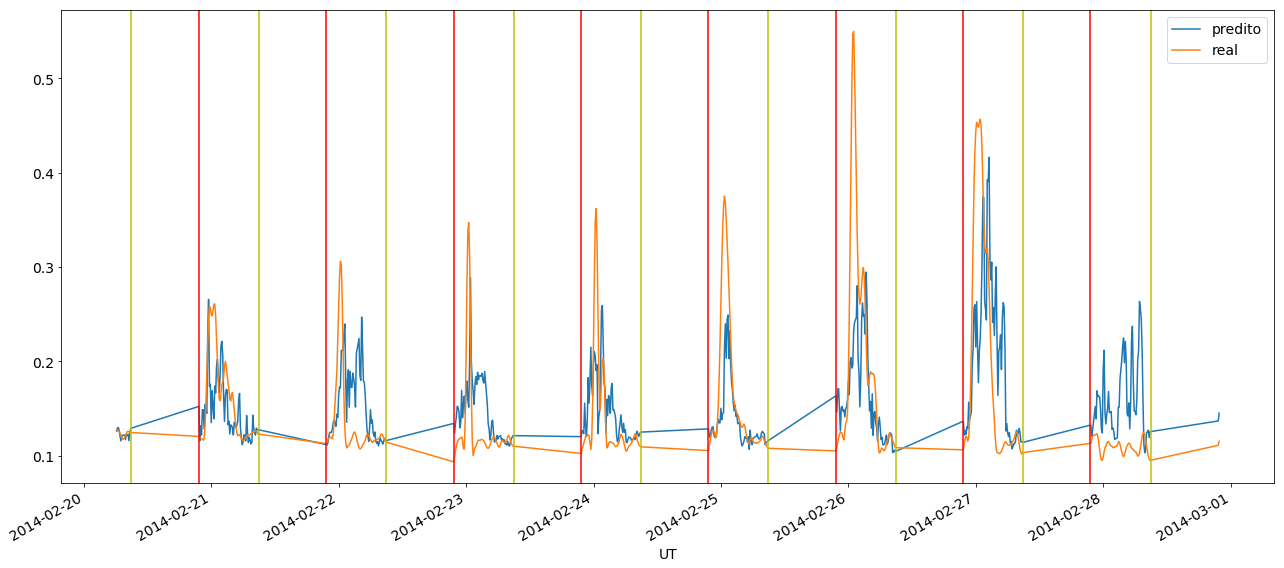


8  ->  original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.877087
f1              0.599692
far             0.382891
fn             37.000000
fp             32.200000
kappa           0.056795
me              0.346885
mse             0.004032
pod             0.584270
precission      0.617109
re             23.463458
recall          0.584270
tn            441.800000
tp             52.000000
tse             1.506225
dtype: float64


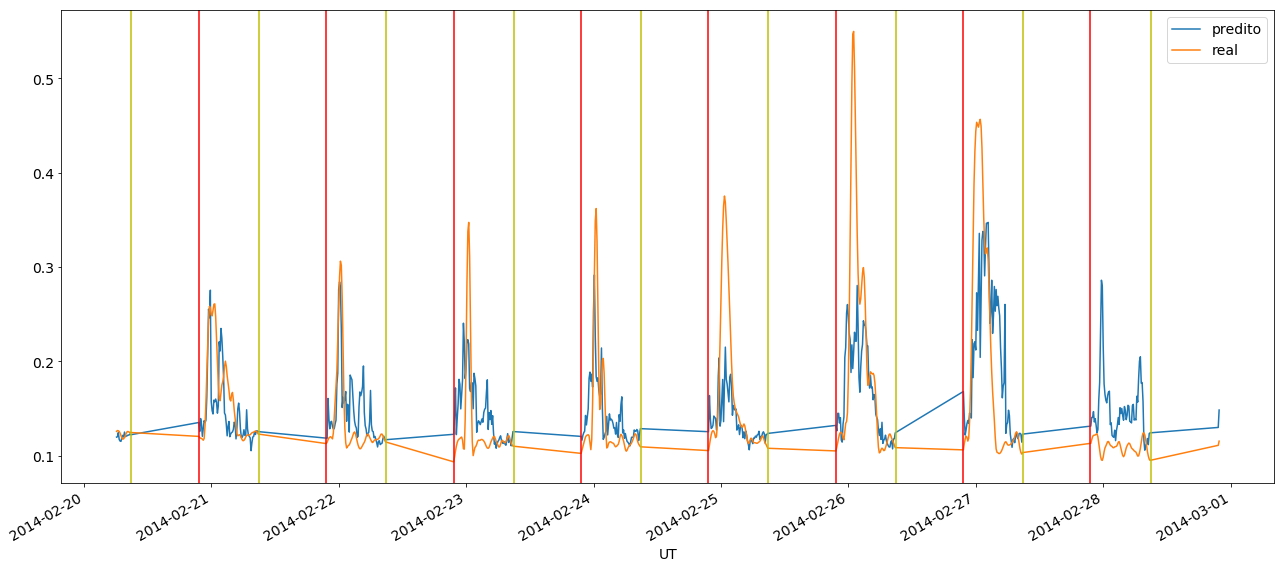


9  ->  original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.863766
f1              0.559631
far             0.426700
fn             40.100000
fp             36.600000
kappa           0.061072
me              0.360757
mse             0.004074
pod             0.549438
precission      0.573300
re             23.927119
recall          0.549438
tn            437.400000
tp             48.900000
tse             1.514312
dtype: float64


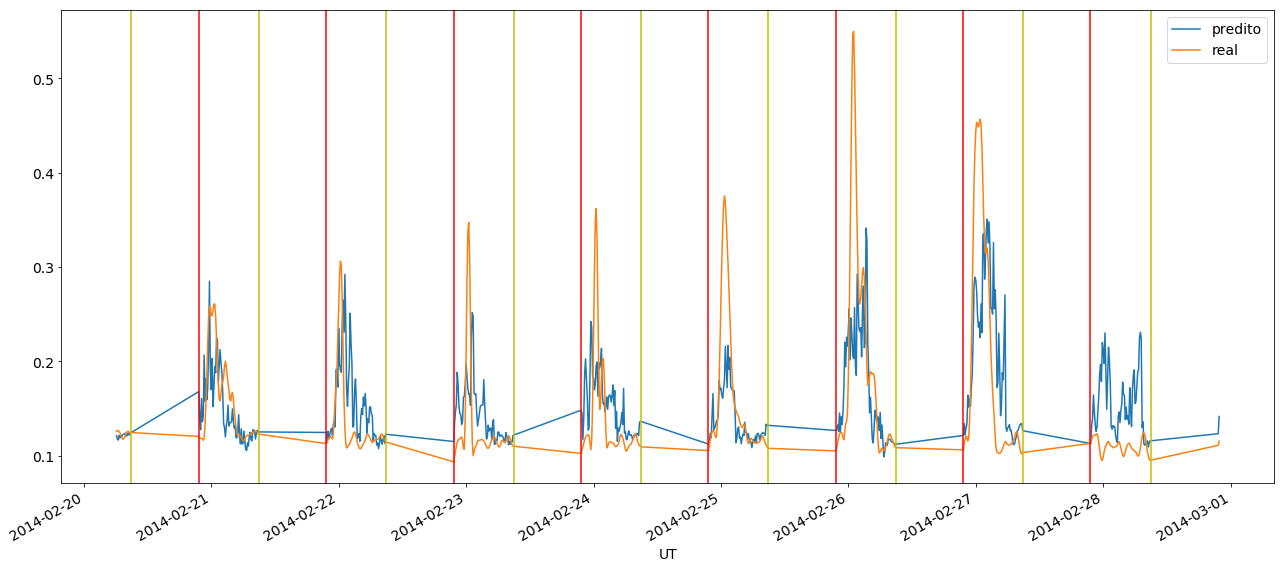


10  ->  original + lag
Error for the time series sample:
acc             0.868028
f1              0.590349
far             0.419252
fn             35.400000
fp             38.900000
kappa           0.055218
me              0.348235
mse             0.004120
pod             0.602247
precission      0.580748
re             24.171156
recall          0.602247
tn            435.100000
tp             53.600000
tse             1.522239
dtype: float64


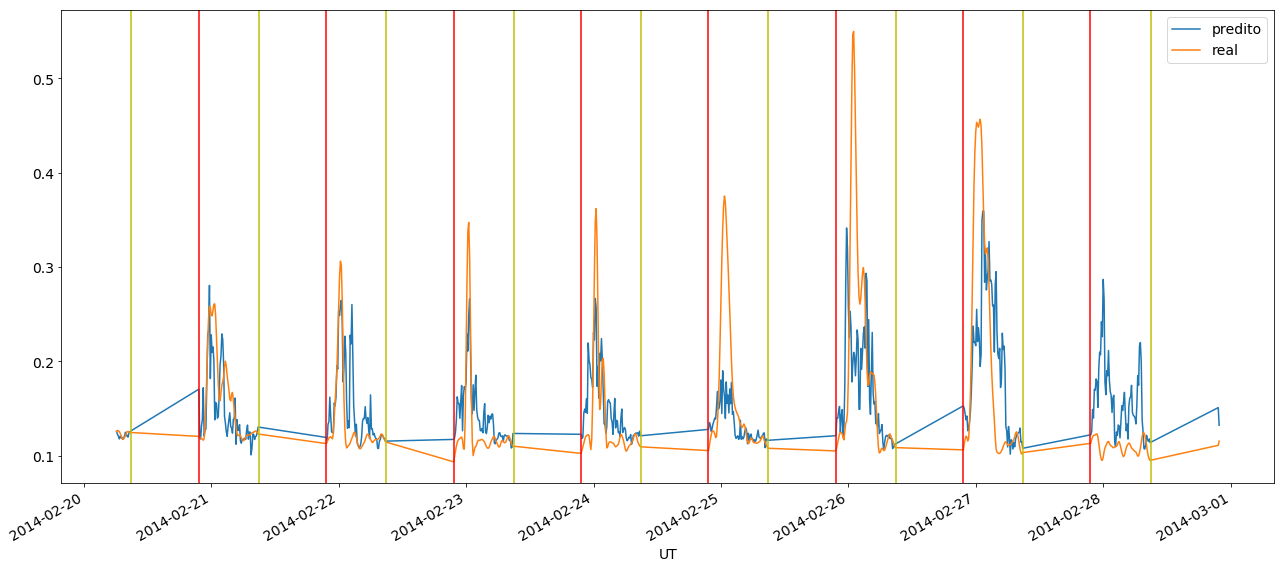


11  ->  original + mdv1
Error for the time series sample:
acc             0.846181
f1              0.595516
far             0.485998
fn             25.600000
fp             61.000000
kappa           0.045513
me              0.336004
mse             0.004400
pod             0.712360
precission      0.514002
re             28.010896
recall          0.712360
tn            413.000000
tp             63.400000
tse             1.572880
dtype: float64


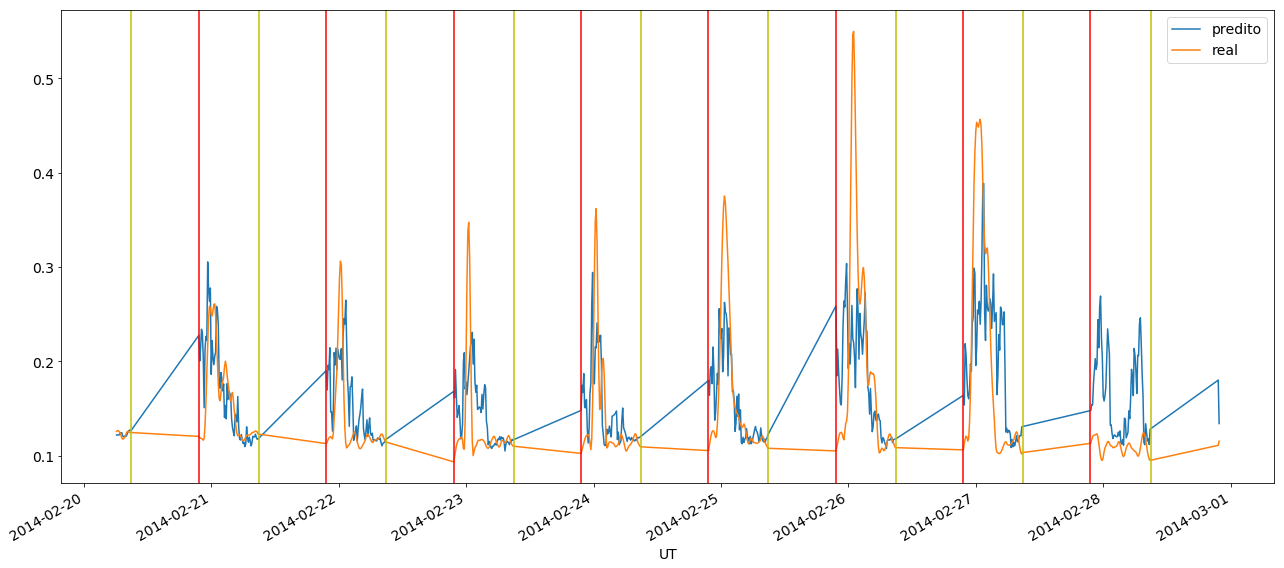


12  ->  original + mdv2
Error for the time series sample:
acc             0.866607
f1              0.553319
far             0.405442
fn             42.400000
fp             32.700000
kappa           0.063930
me              0.352331
mse             0.004319
pod             0.523596
precission      0.594558
re             25.679873
recall          0.523596
tn            441.300000
tp             46.600000
tse             1.558750
dtype: float64


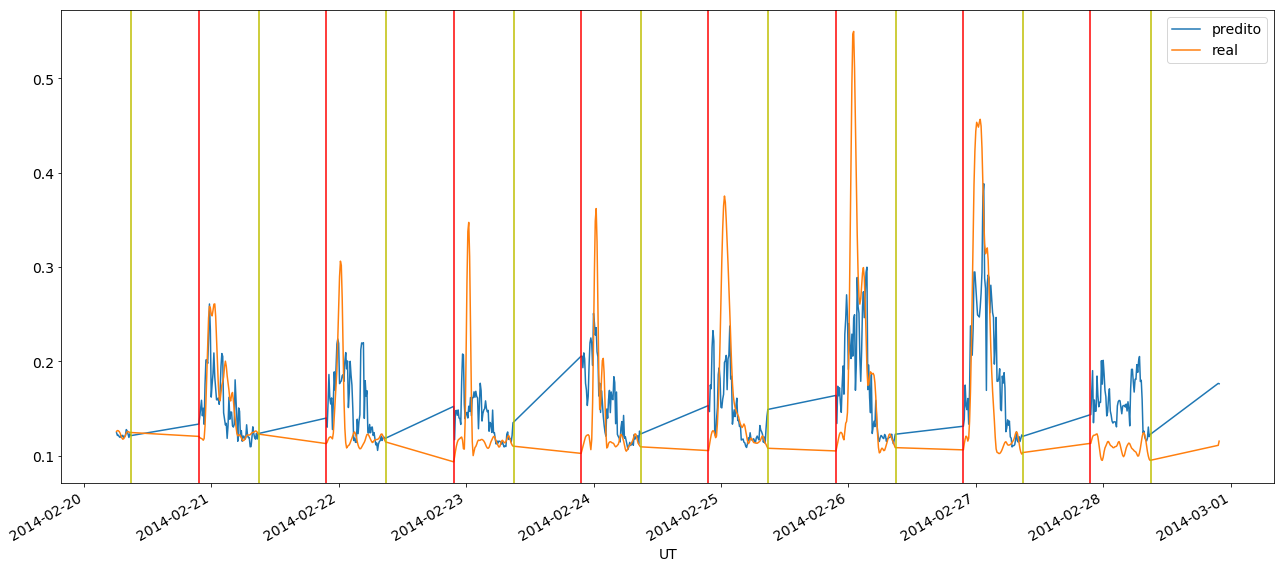


13  ->  original + tempo + lag
Error for the time series sample:
acc             0.884192
f1              0.633154
far             0.363607
fn             32.600000
fp             32.600000
kappa           0.051291
me              0.359200
mse             0.003820
pod             0.633708
precission      0.636393
re             22.523517
recall          0.633708
tn            441.400000
tp             56.400000
tse             1.466044
dtype: float64


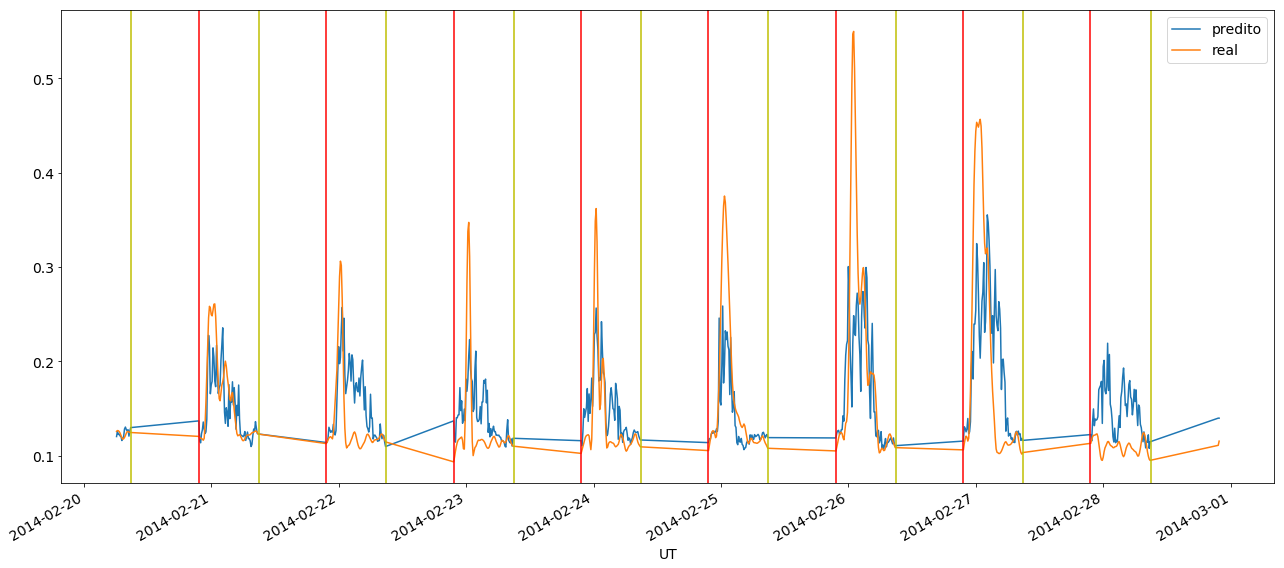


14  ->  original + tempo + mdv2
Error for the time series sample:
acc             0.876377
f1              0.611243
far             0.388258
fn             34.400000
fp             35.200000
kappa           0.053699
me              0.340575
mse             0.004141
pod             0.613483
precission      0.611742
re             25.229862
recall          0.613483
tn            438.800000
tp             54.600000
tse             1.526346
dtype: float64


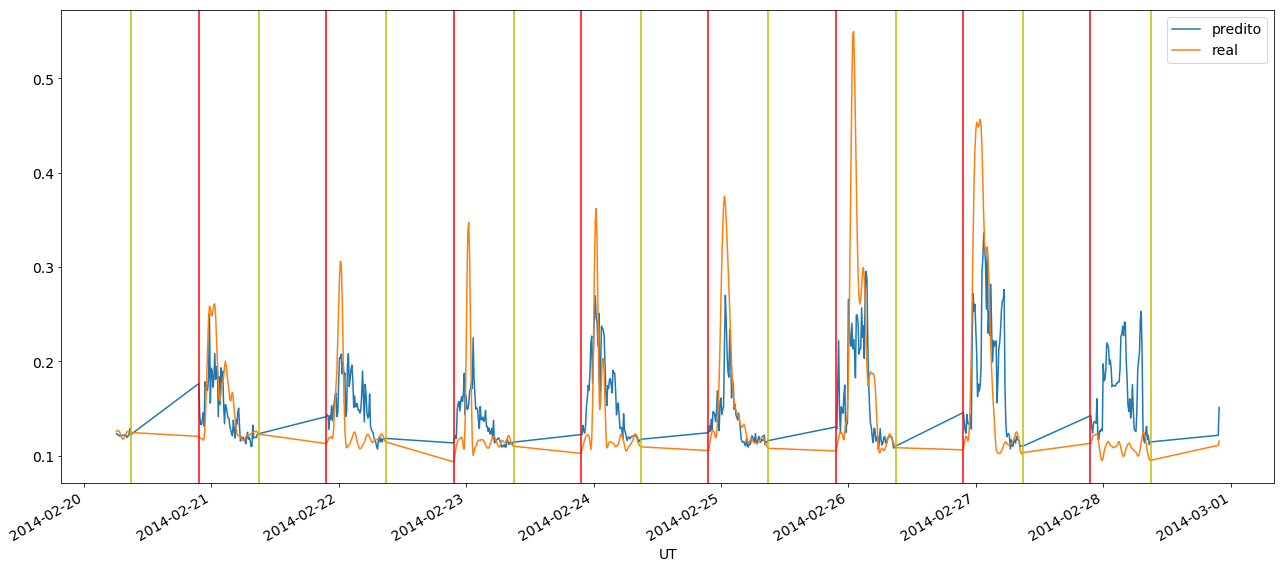


15  ->  original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.867851
f1              0.615373
far             0.429725
fn             29.100000
fp             45.300000
kappa           0.048098
me              0.337901
mse             0.003898
pod             0.673034
precission      0.570275
re             24.410860
recall          0.673034
tn            428.700000
tp             59.900000
tse             1.480904
dtype: float64


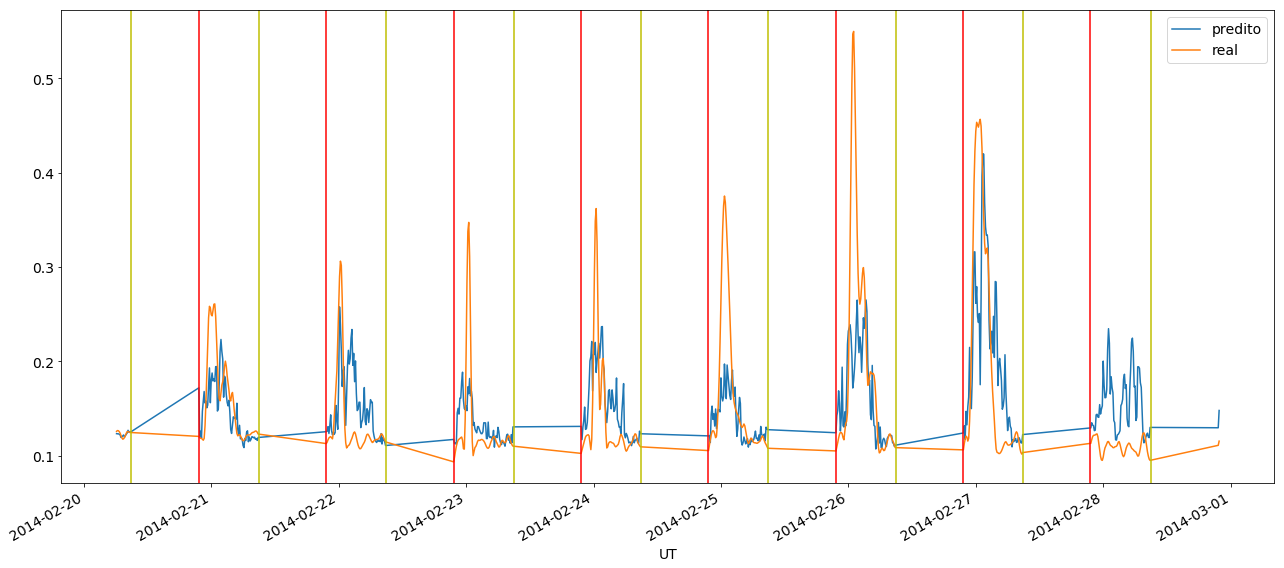


16  ->  original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.856483
f1              0.622561
far             0.465499
fn             22.400000
fp             58.400000
kappa           0.041697
me              0.327556
mse             0.004173
pod             0.748315
precission      0.534501
re             28.041071
recall          0.748315
tn            415.600000
tp             66.600000
tse             1.531977
dtype: float64


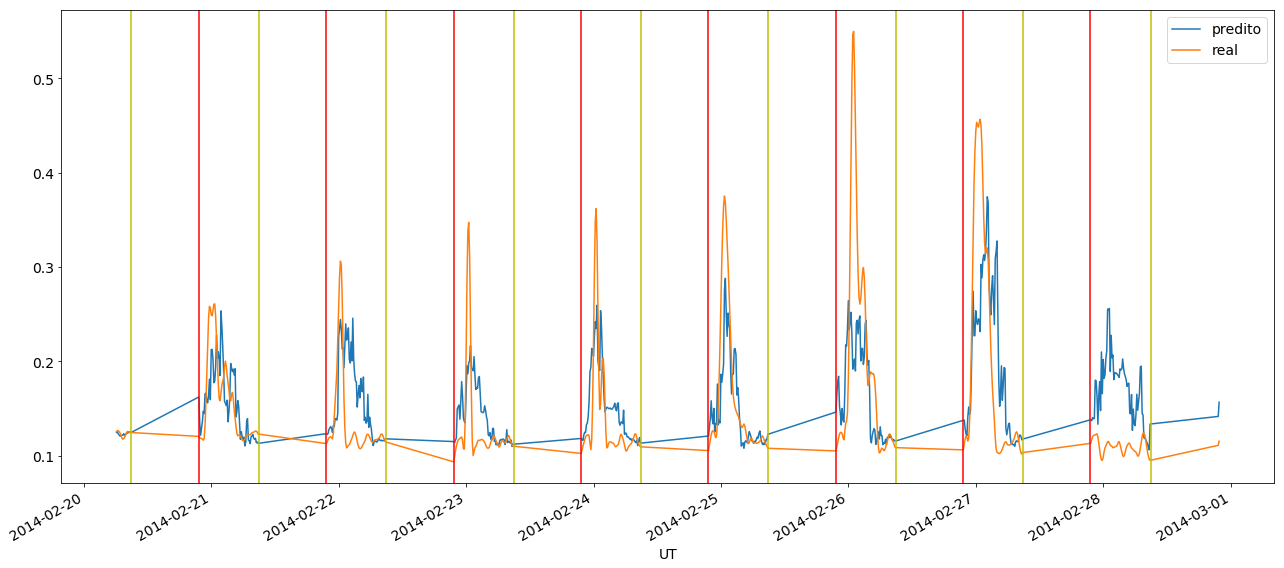


17  ->  vtec
Error for the time series sample:
acc             0.781528
f1              0.260239
far             0.720323
fn             67.300000
fp             55.700000
kappa           0.092663
me              0.392395
mse             0.007191
pod             0.243820
precission      0.279677
re             30.385954
recall          0.243820
tn            418.300000
tp             21.700000
tse             2.012030
dtype: float64


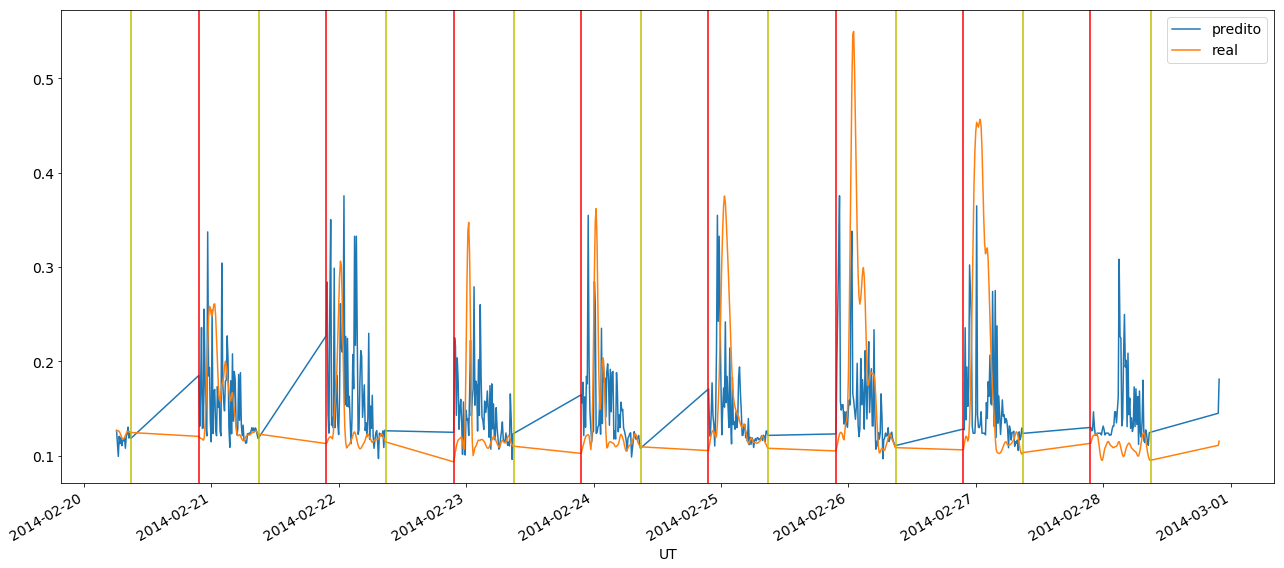


18  ->  vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.800178
f1              0.487815
far             0.588779
fn             35.400000
fp             77.100000
kappa           0.057495
me              0.346771
mse             0.006045
pod             0.602247
precission      0.411221
re             35.077113
recall          0.602247
tn            396.900000
tp             53.600000
tse             1.844725
dtype: float64


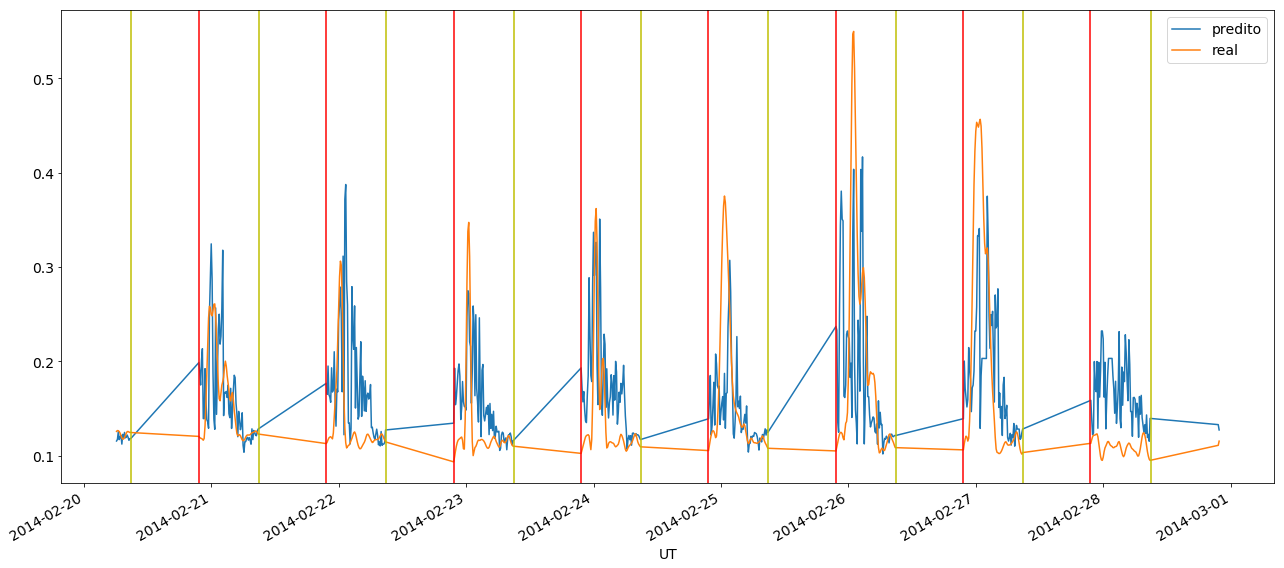


19  ->  vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.828064
f1              0.480238
far             0.539037
fn             44.300000
fp             52.500000
kappa           0.066320
me              0.321370
mse             0.004536
pod             0.502247
precission      0.460963
re             26.813181
recall          0.502247
tn            421.500000
tp             44.700000
tse             1.597663
dtype: float64


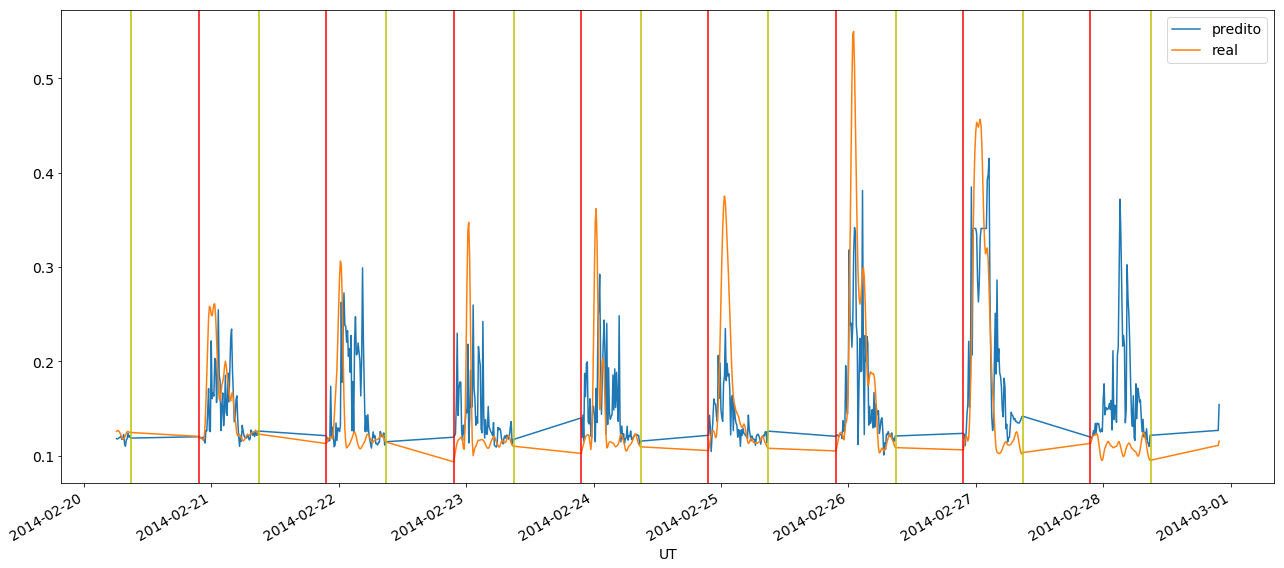


20  ->  vtec + vtec_dt_lag_3 + vtec_dt2
Error for the time series sample:
acc             0.824867
f1              0.517418
far             0.541553
fn             36.100000
fp             62.500000
kappa           0.057305
me              0.338739
mse             0.005969
pod             0.594382
precission      0.458447
re             32.105126
recall          0.594382
tn            411.500000
tp             52.900000
tse             1.831933
dtype: float64


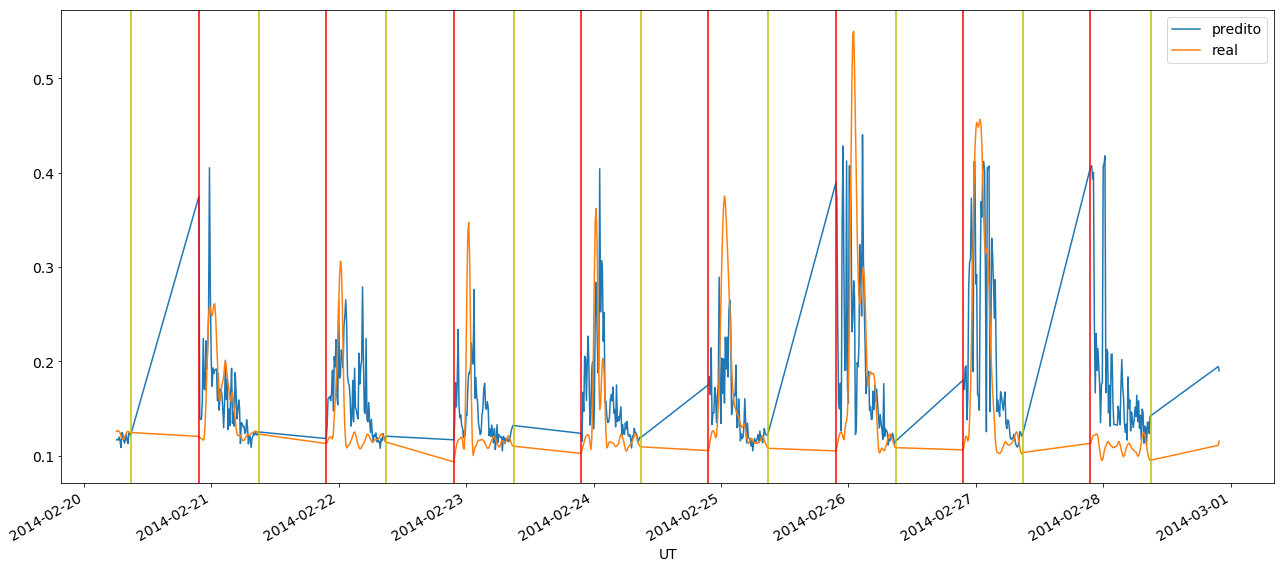


21  ->  vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.832860
f1              0.342415
far             0.544164
fn             64.500000
fp             29.600000
kappa           0.092734
me              0.371942
mse             0.005506
pod             0.275281
precission      0.455836
re             23.712948
recall          0.275281
tn            444.400000
tp             24.500000
tse             1.760570
dtype: float64


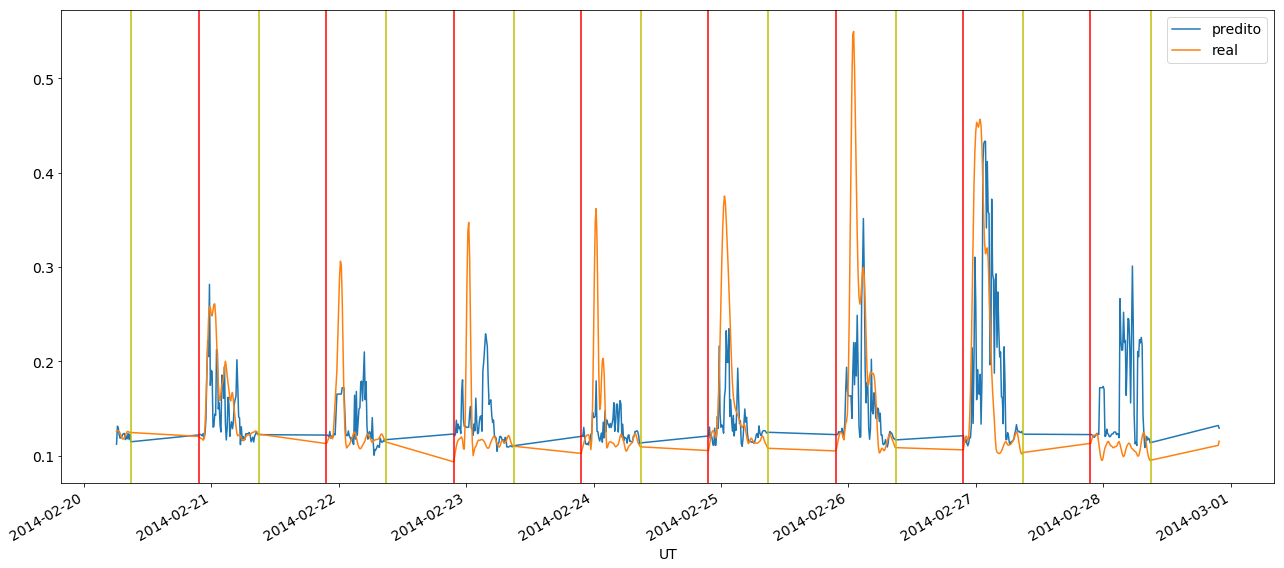


22  ->  vtec + tempo
Error for the time series sample:
acc             0.782238
f1              0.382866
far             0.652994
fn             50.900000
fp             71.700000
kappa           0.073282
me              0.364215
mse             0.006869
pod             0.428090
precission      0.347006
re             32.459730
recall          0.428090
tn            402.300000
tp             38.100000
tse             1.966496
dtype: float64


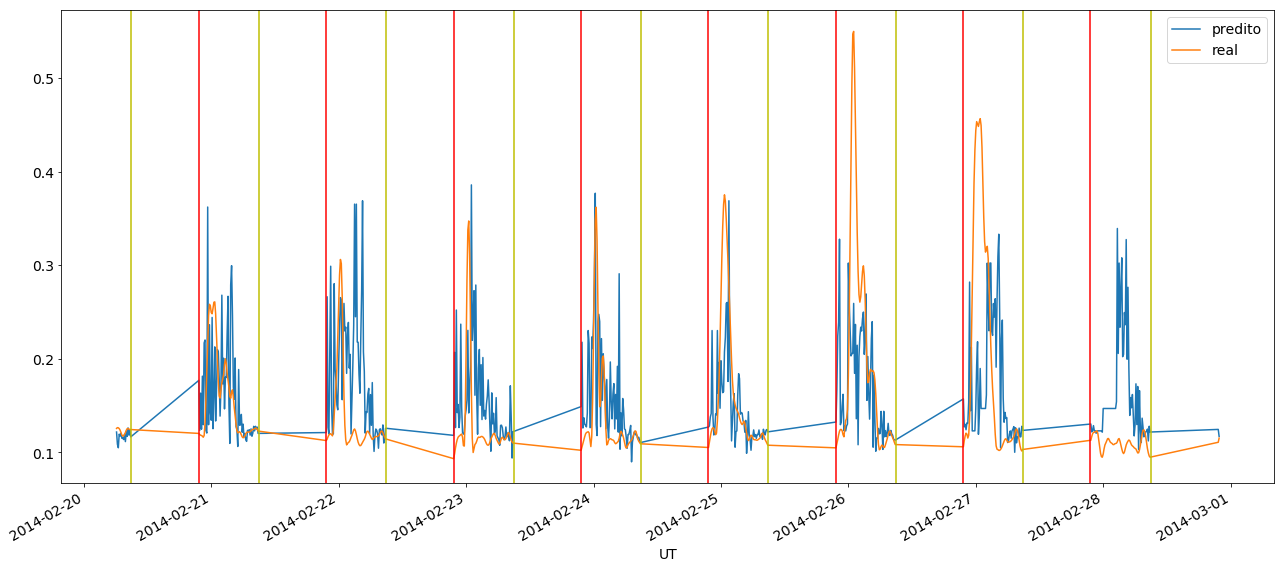


23  ->  vtec + tempo + mdv1
Error for the time series sample:
acc             0.777442
f1              0.479382
far             0.617398
fn             30.900000
fp             94.400000
kappa           0.055139
me              0.312976
mse             0.009078
pod             0.652809
precission      0.382602
re             40.563591
recall          0.652809
tn            379.600000
tp             58.100000
tse             2.255561
dtype: float64


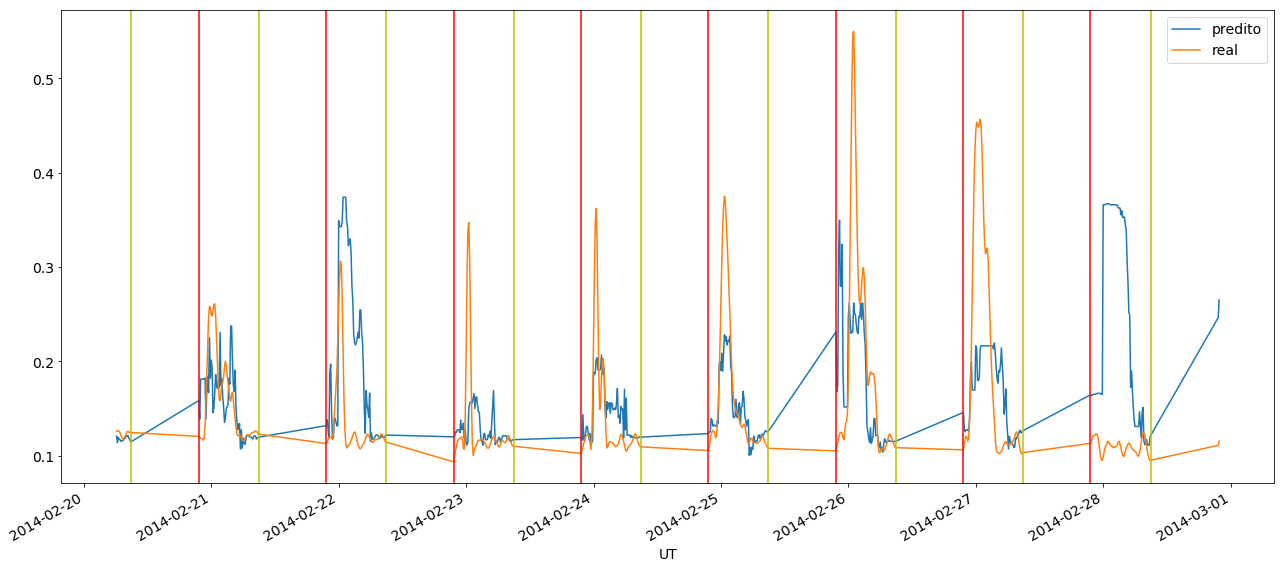


24  ->  vtec + tempo + lag
Error for the time series sample:
acc             0.825933
f1              0.538071
far             0.536117
fn             31.900000
fp             66.100000
kappa           0.053002
me              0.325327
mse             0.004778
pod             0.641573
precission      0.463883
re             28.899487
recall          0.641573
tn            407.900000
tp             57.100000
tse             1.639316
dtype: float64


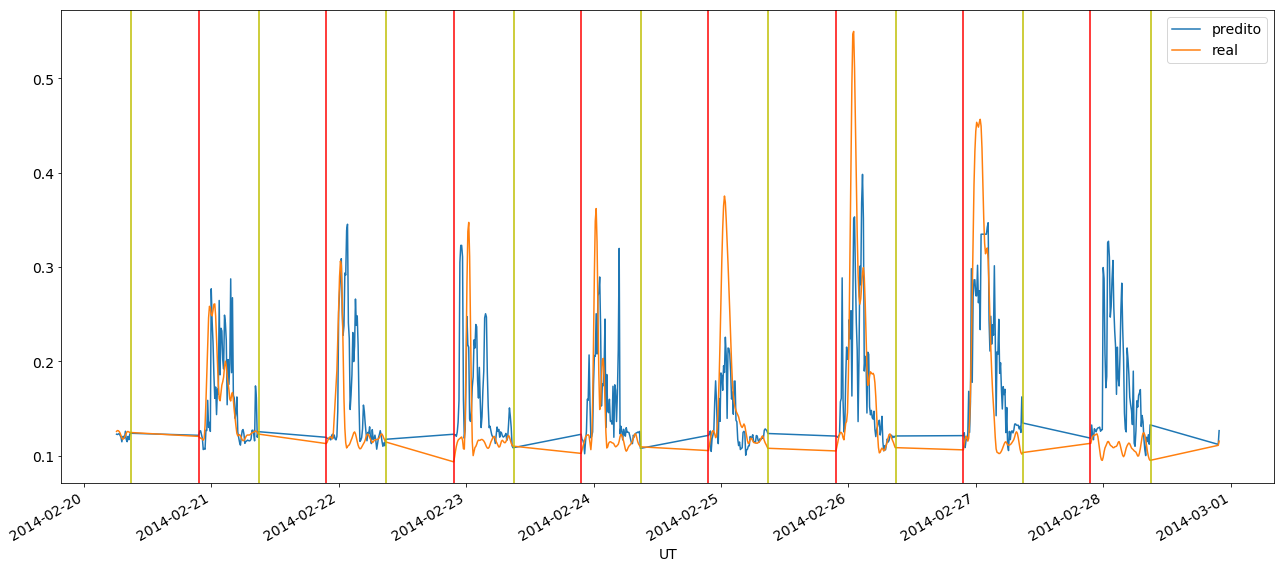


25  ->  vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.793250
f1              0.541026
far             0.583128
fn             20.400000
fp             96.000000
kappa           0.045090
me              0.316749
mse             0.007456
pod             0.770787
precission      0.416872
re             36.702701
recall          0.770787
tn            378.000000
tp             68.600000
tse             2.047342
dtype: float64


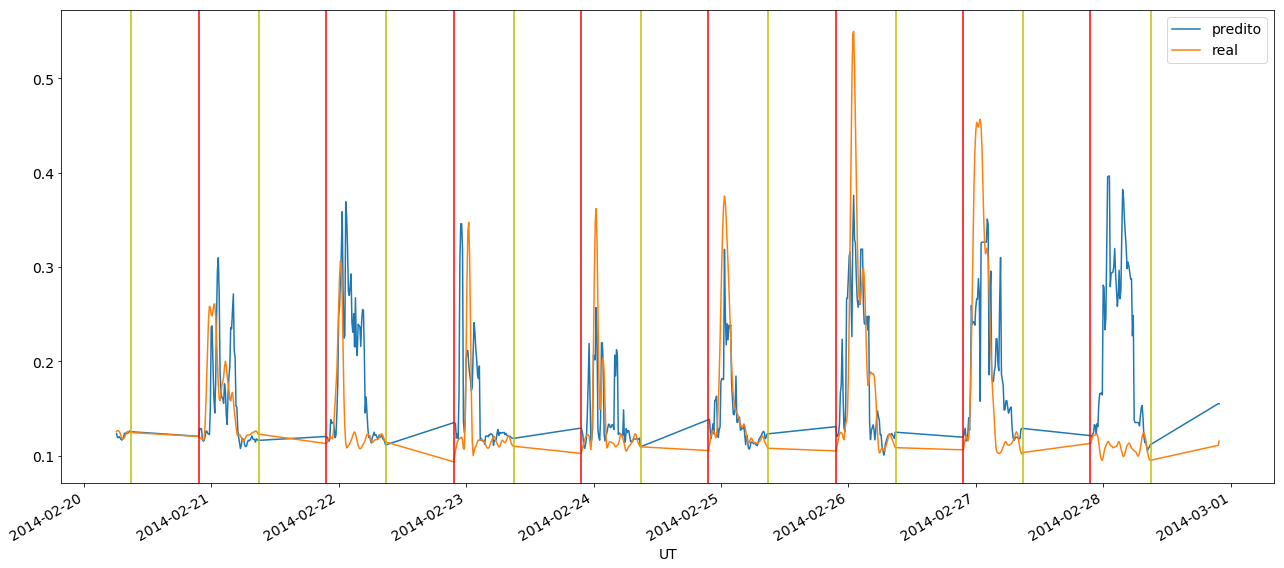


26  ->  vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.792362
f1              0.457075
far             0.609236
fn             39.300000
fp             77.600000
kappa           0.061774
me              0.286054
mse             0.005218
pod             0.558427
precission      0.390764
re             30.453466
recall          0.558427
tn            396.400000
tp             49.700000
tse             1.712846
dtype: float64


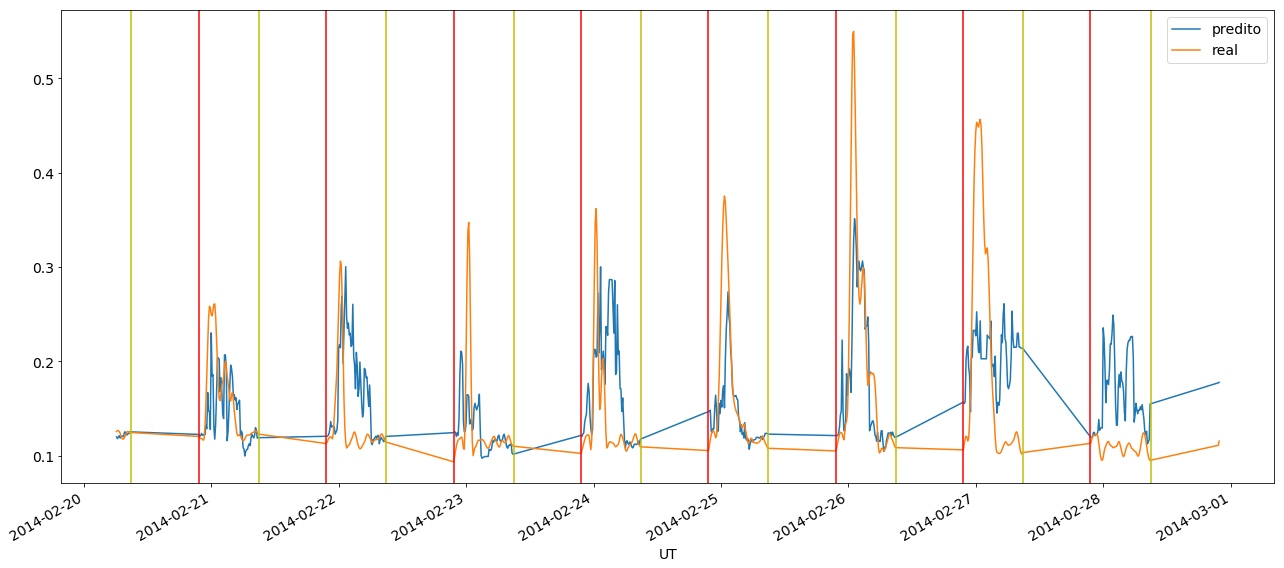


27  ->  vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.772114
f1              0.494919
far             0.618736
fn             26.200000
fp            102.100000
kappa           0.050935
me              0.301059
mse             0.007195
pod             0.705618
precission      0.381264
re             38.263523
recall          0.705618
tn            371.900000
tp             62.800000
tse             2.008037
dtype: float64


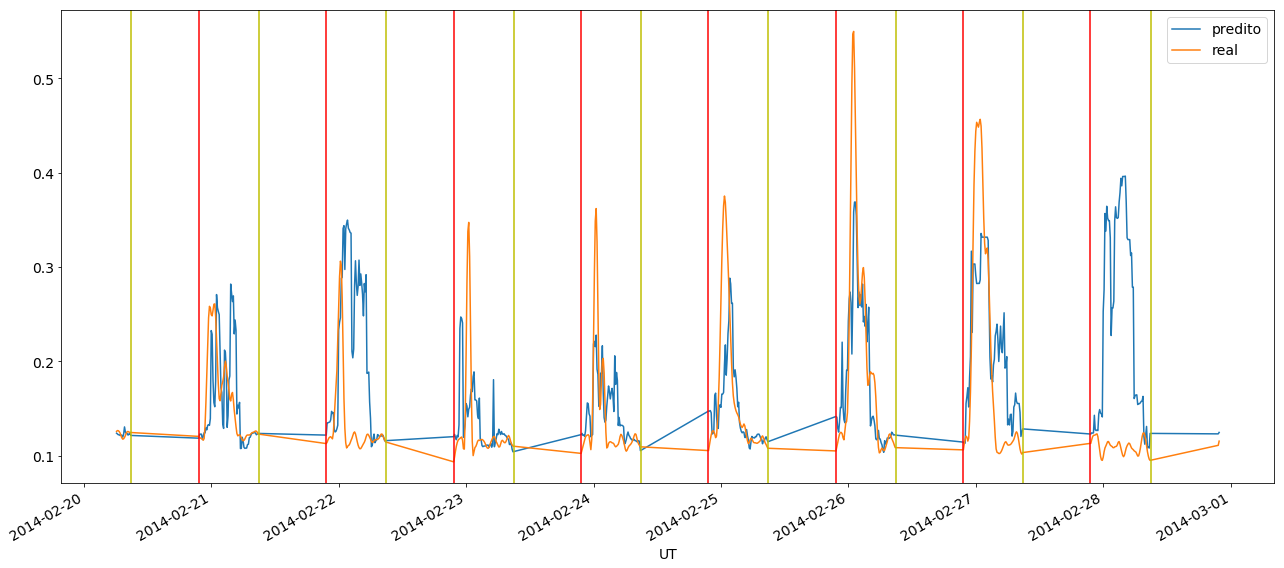

In [7]:
with open('./data/result/09_analise_all_new_vtec_dt.txt', 'w') as file:
    errors = []
    for idx, i in enumerate(set_tests):
        print(idx,' -> ', i.name)
        if param_grid is not None:
            if idx != 0:
                file.write('\n')
            file.write(idx+' -> '+i.name+'\n')
        dict_error = generate_and_avaliate_model(df=df,
                                                instances_set=list(i.set),
                                                target='s4',
                                                save=True,
                                                grid_search=True,
                                                file_to_save_model='./images/09_analise_all_new_vtec_dt/' + i.name + '.eps ',
                                                file=file)
        dict_error['name'] = i.name
        errors.append(dict_error)
        print()

In [8]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [9]:
with open('./data/result/09_analise_all_new_vtec_dt.txt', 'a') as file:
    file.write(df.to_string())